# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [5]:
interesse = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'renda']
previsao_renda[interesse]

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,renda
0,False,True,0,26,8060.34
1,True,True,0,28,1852.15
2,True,True,0,35,2253.89
3,False,True,1,30,6600.77
4,True,False,0,33,6475.97
...,...,...,...,...,...
14995,False,True,0,48,7990.58
14996,False,True,0,57,10093.45
14997,True,True,0,45,604.82
14998,True,False,0,36,3352.27


In [6]:
previsao_renda[interesse].corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,renda
posse_de_veiculo,1.000000,-0.014172,0.118690,-0.178903,0.100493
posse_de_imovel,-0.014172,1.000000,-0.022738,0.140510,0.003880
qtd_filhos,0.118690,-0.022738,1.000000,-0.360426,0.029346
idade,-0.178903,0.140510,-0.360426,1.000000,0.022435
renda,0.100493,0.003880,0.029346,0.022435,1.000000


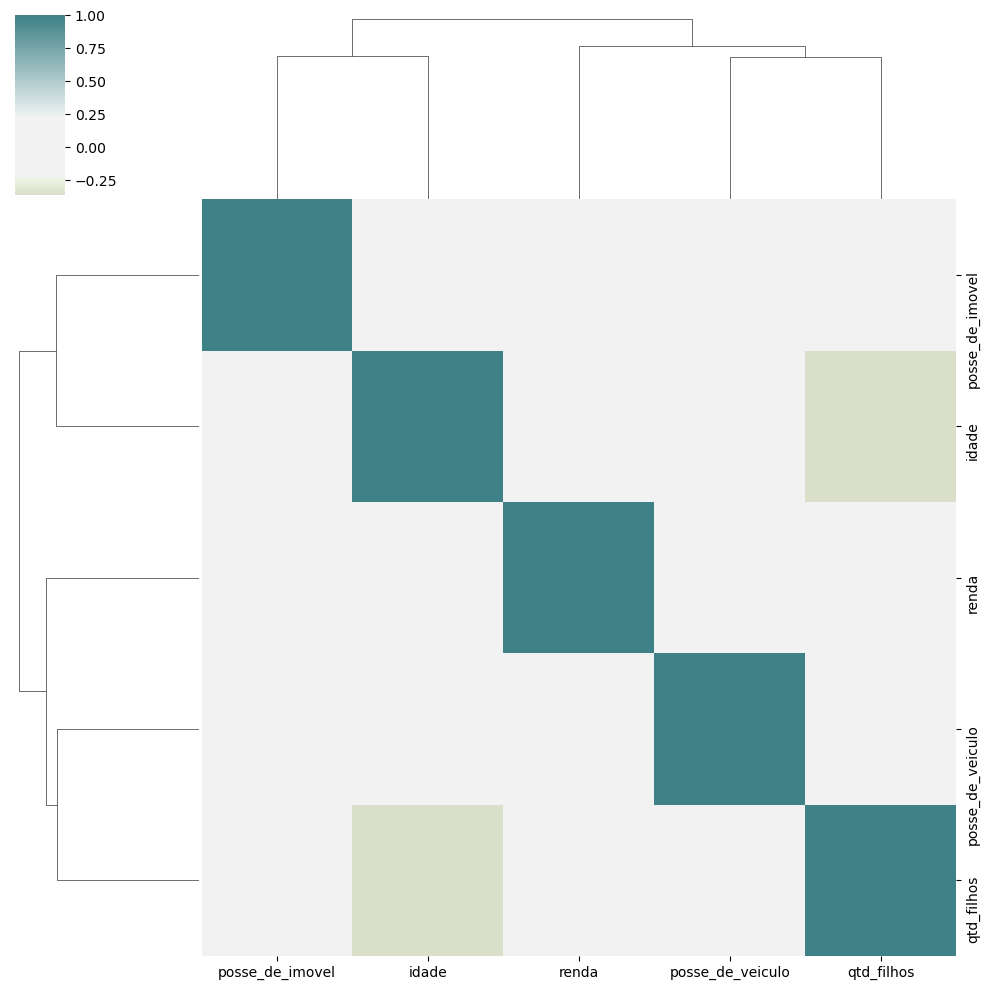

In [7]:
cmap = sns.diverging_palette(h_neg=100, h_pos=200, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_renda[interesse].corr(), figsize=(10, 10), center = 0, cmap=cmap);

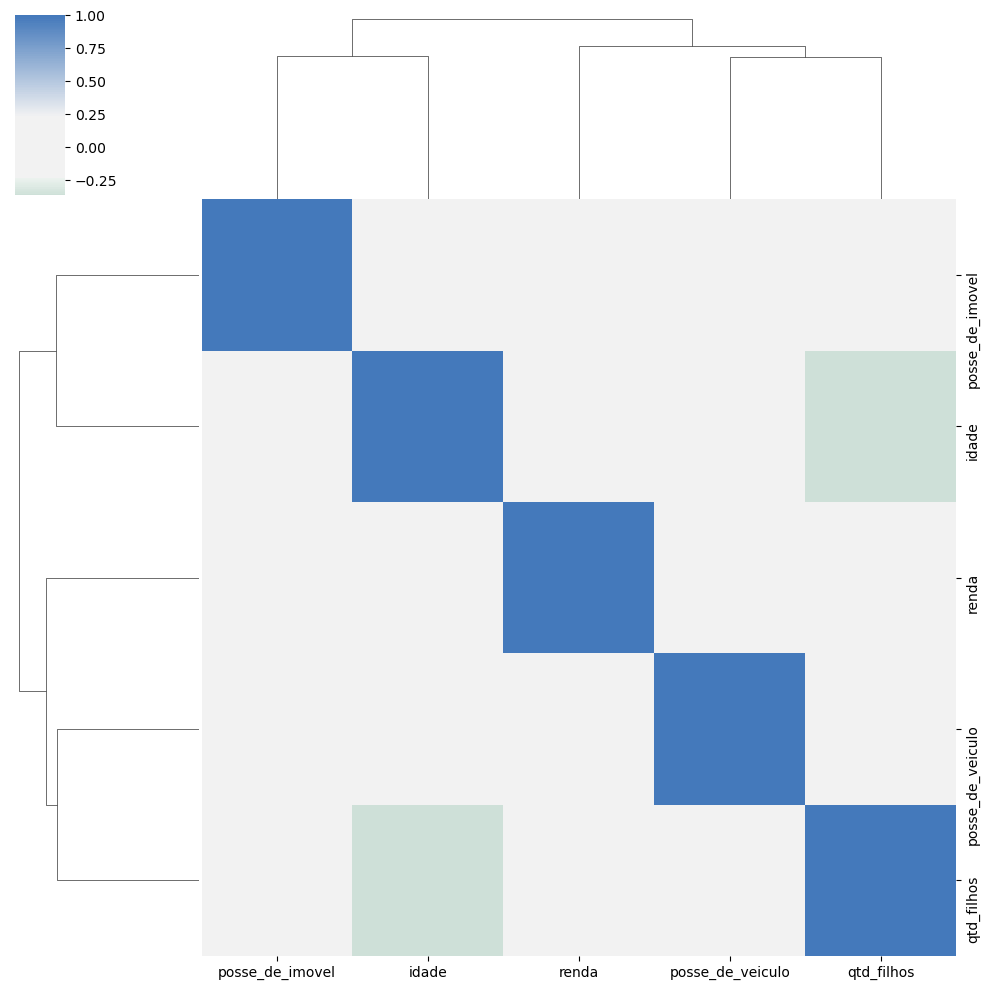

In [8]:
cmap = sns.diverging_palette(h_neg=150, h_pos=250, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_renda[interesse].corr(), figsize=(10, 10), center = 0, cmap=cmap);

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [9]:
previsao_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


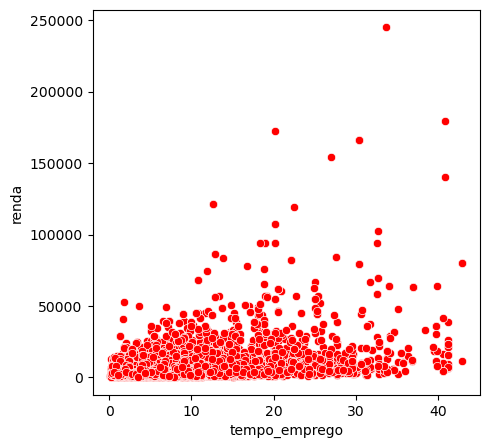

In [10]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=previsao_renda['tempo_emprego'], y=previsao_renda['renda'], color='red');
plt.xlabel('tempo_emprego')
plt.ylabel('renda')
plt.show()

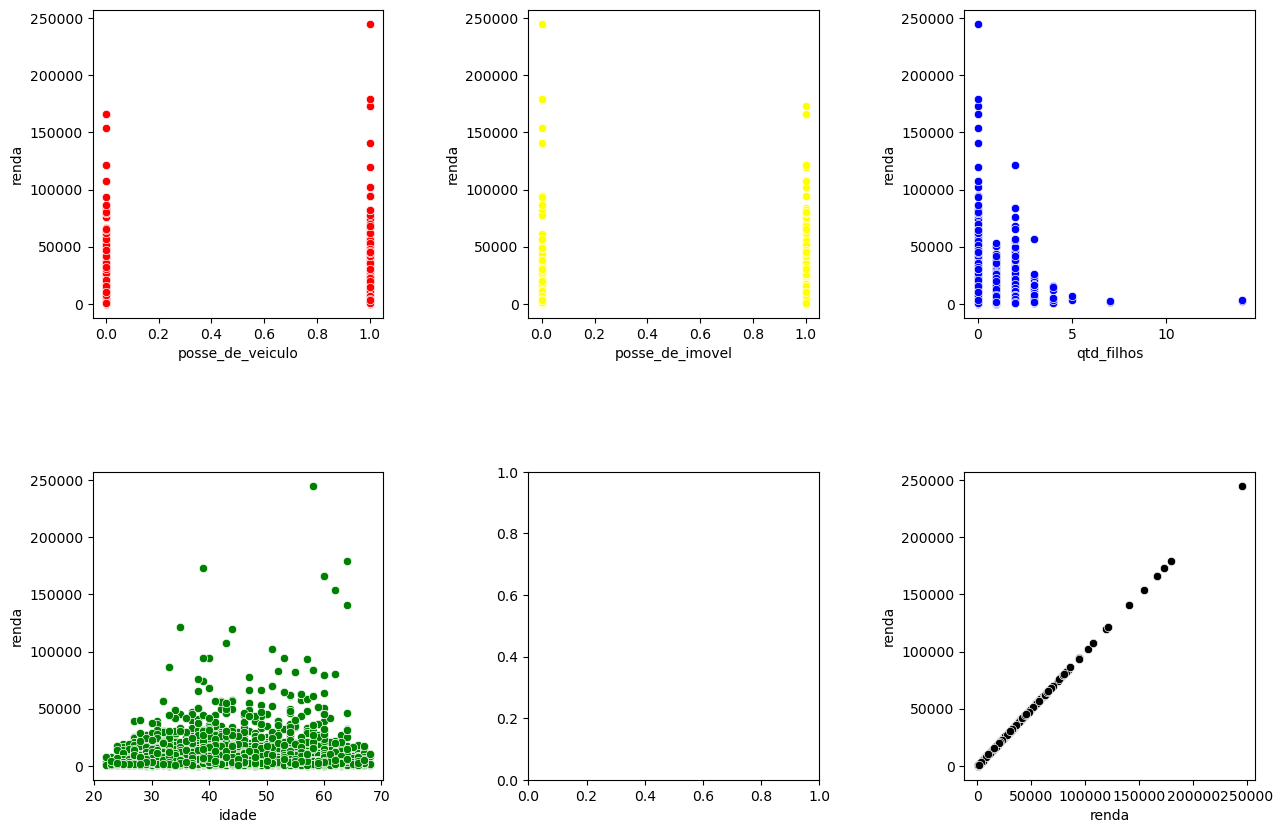

In [12]:
#interesse = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'index', 'renda']
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax = axes[0, 0],x=previsao_renda['posse_de_veiculo'], y=previsao_renda['renda'], color='red');
sns.scatterplot(ax = axes[0, 1],x=previsao_renda['posse_de_imovel'], y=previsao_renda['renda'], color='yellow');
sns.scatterplot(ax = axes[0, 2],x=previsao_renda['qtd_filhos'], y=previsao_renda['renda'], color='blue');
sns.scatterplot(ax = axes[1, 0],x=previsao_renda['idade'], y=previsao_renda['renda'], color='green');
sns.scatterplot(ax = axes[1, 2],x=previsao_renda['renda'], y=previsao_renda['renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

3) Na su aopinião, há outliers na variável renda?

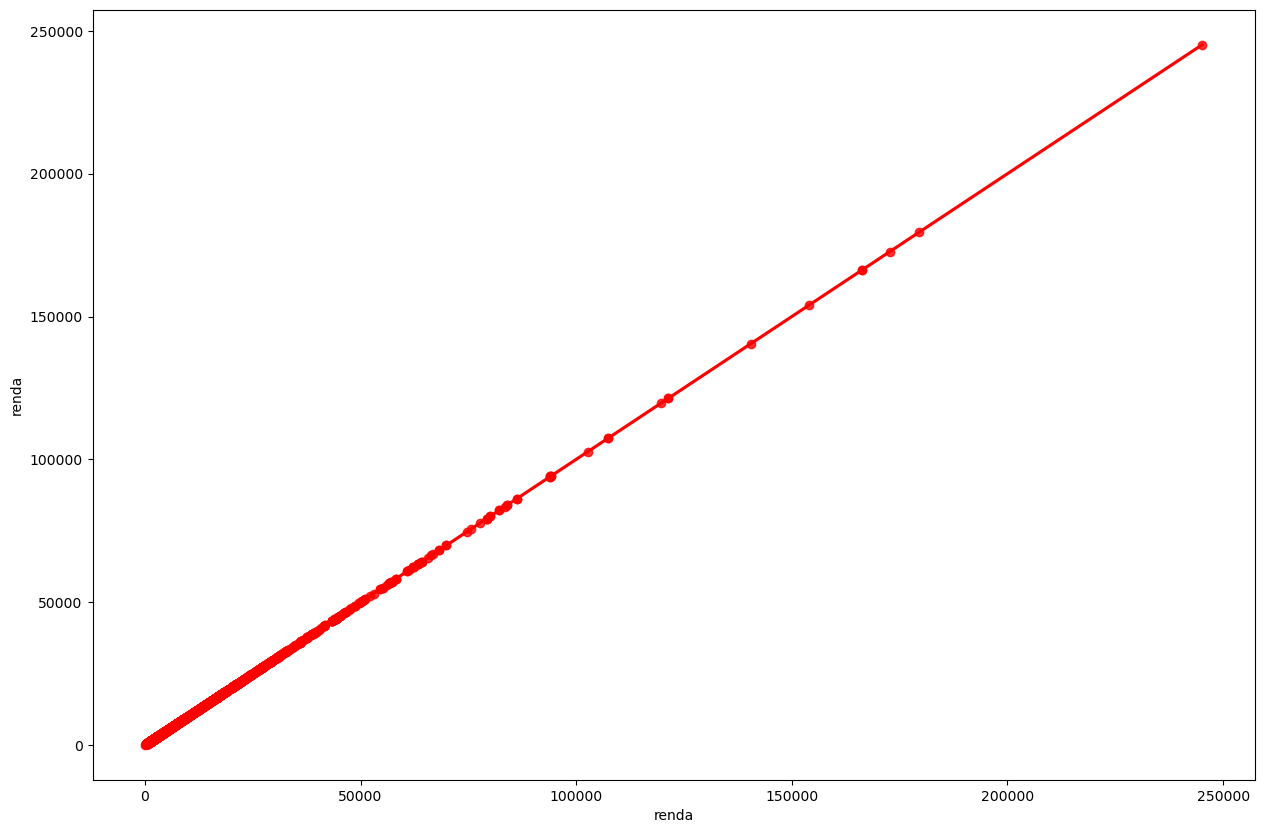

In [13]:
sns.regplot(x=previsao_renda['renda'], y=previsao_renda['renda'], color='red');

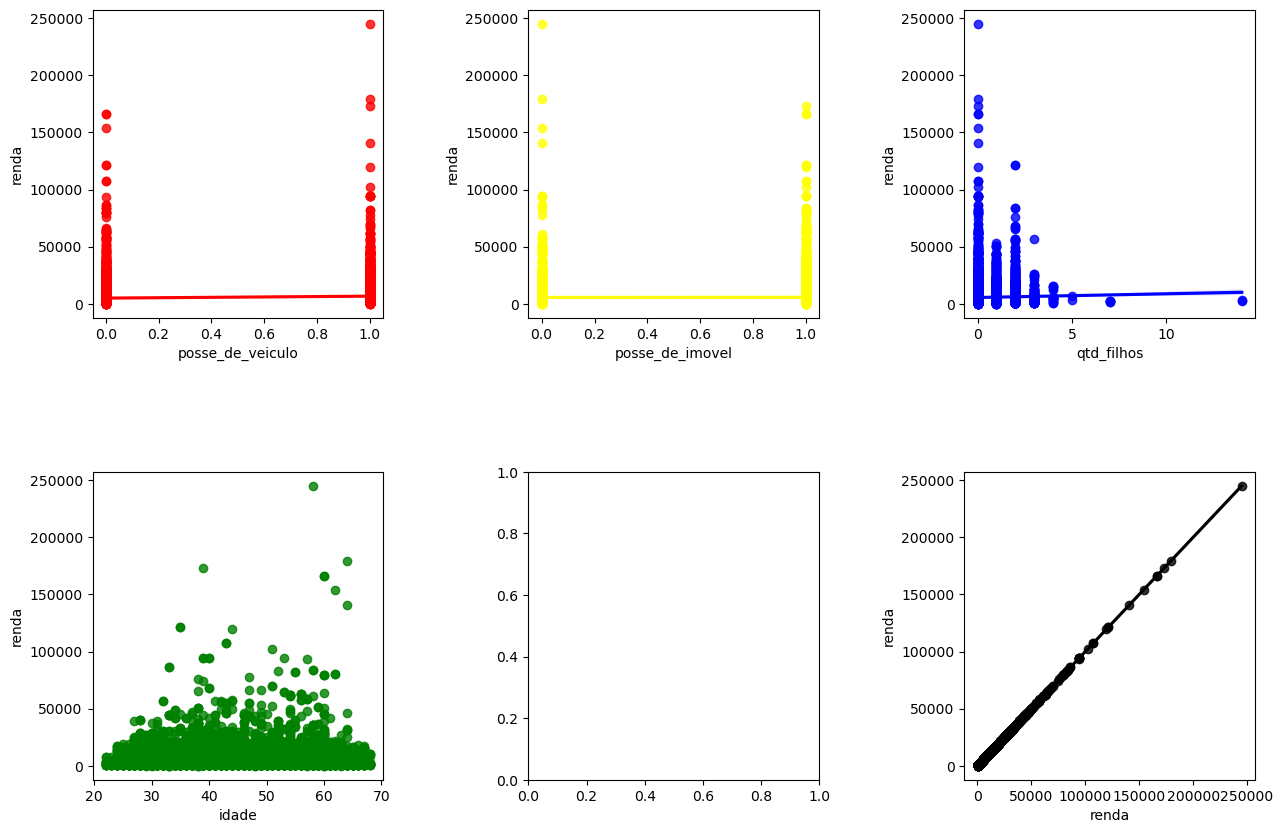

In [14]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.regplot(ax = axes[0, 0],x=previsao_renda['posse_de_veiculo'], y=previsao_renda['renda'], color='red');
sns.regplot(ax = axes[0, 1],x=previsao_renda['posse_de_imovel'], y=previsao_renda['renda'], color='yellow');
sns.regplot(ax = axes[0, 2],x=previsao_renda['qtd_filhos'], y=previsao_renda['renda'], color='blue');
sns.regplot(ax = axes[1, 0],x=previsao_renda['idade'], y=previsao_renda['renda'], color='green');
sns.regplot(ax = axes[1, 2],x=previsao_renda['renda'], y=previsao_renda['renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [64]:
# O rendimento está alinhado, mas alguns estão acima da media 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [18]:
interesse_log = previsao_renda[interesse].copy()

interesse_log

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,renda
0,False,True,0,26,8060.34
1,True,True,0,28,1852.15
2,True,True,0,35,2253.89
3,False,True,1,30,6600.77
4,True,False,0,33,6475.97
...,...,...,...,...,...
14995,False,True,0,48,7990.58
14996,False,True,0,57,10093.45
14997,True,True,0,45,604.82
14998,True,False,0,36,3352.27


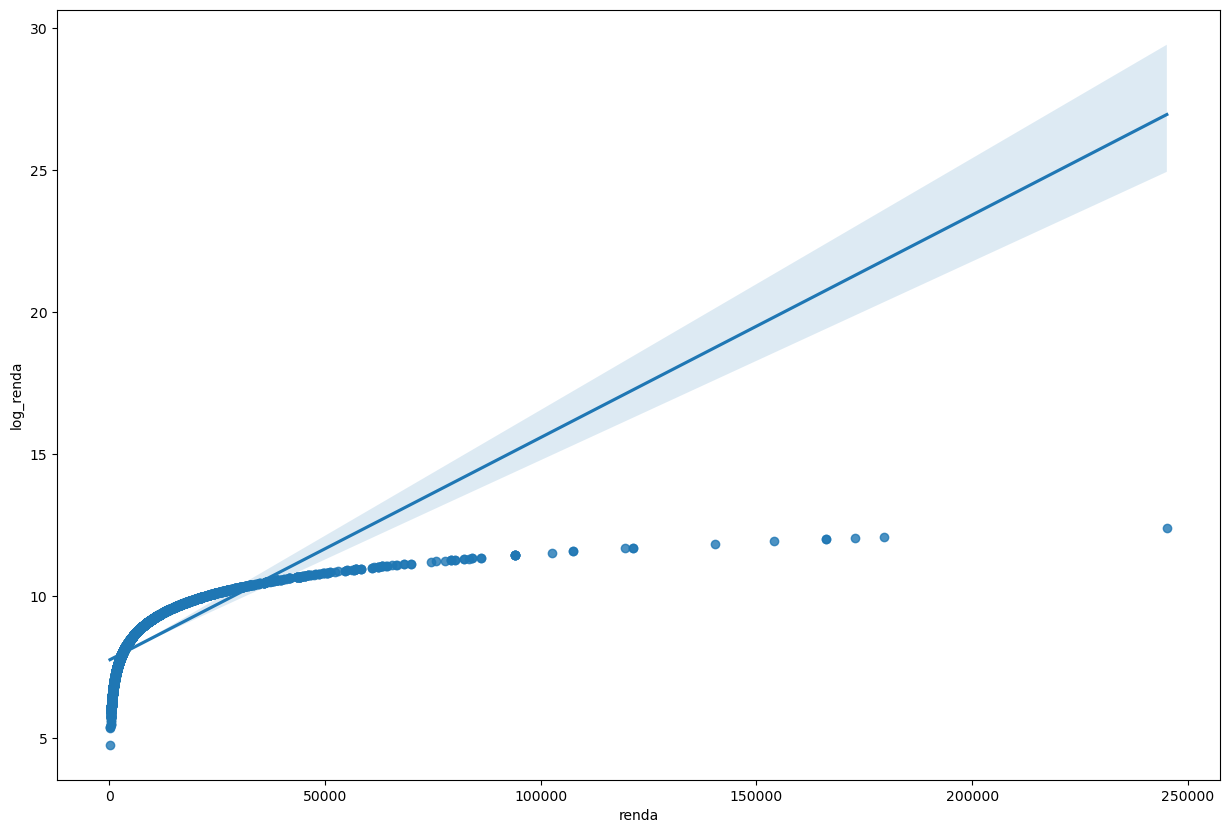

In [19]:

interesse_log['log_renda'] = np.log(interesse_log['renda'])

_ = sns.regplot(x='renda', y='log_renda', data= interesse_log)

In [20]:
interesse_log.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,renda,log_renda
posse_de_veiculo,1.000000,-0.014172,0.118690,-0.178903,0.100493,0.151478
posse_de_imovel,-0.014172,1.000000,-0.022738,0.140510,0.003880,0.023777
qtd_filhos,0.118690,-0.022738,1.000000,-0.360426,0.029346,0.048858
idade,-0.178903,0.140510,-0.360426,1.000000,0.022435,-0.001177
renda,0.100493,0.003880,0.029346,0.022435,1.000000,0.733094
log_renda,0.151478,0.023777,0.048858,-0.001177,0.733094,1.000000


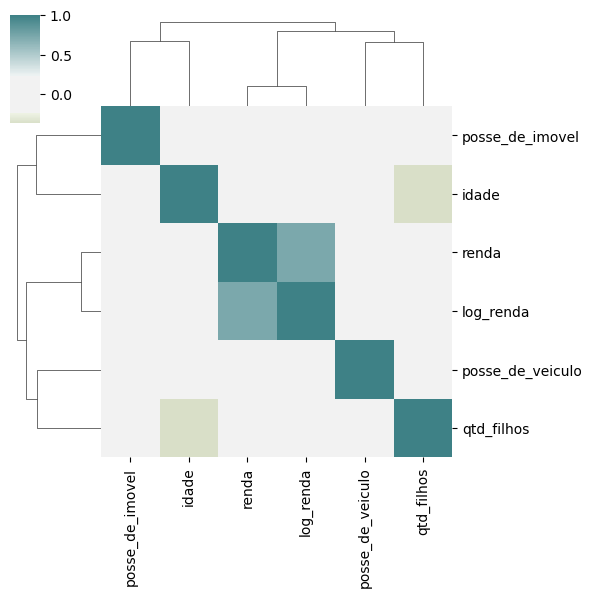

In [21]:
cmap = sns.diverging_palette(h_neg=100, h_pos=200, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(interesse_log.corr(), figsize=(6, 6), center = 0, cmap=cmap);

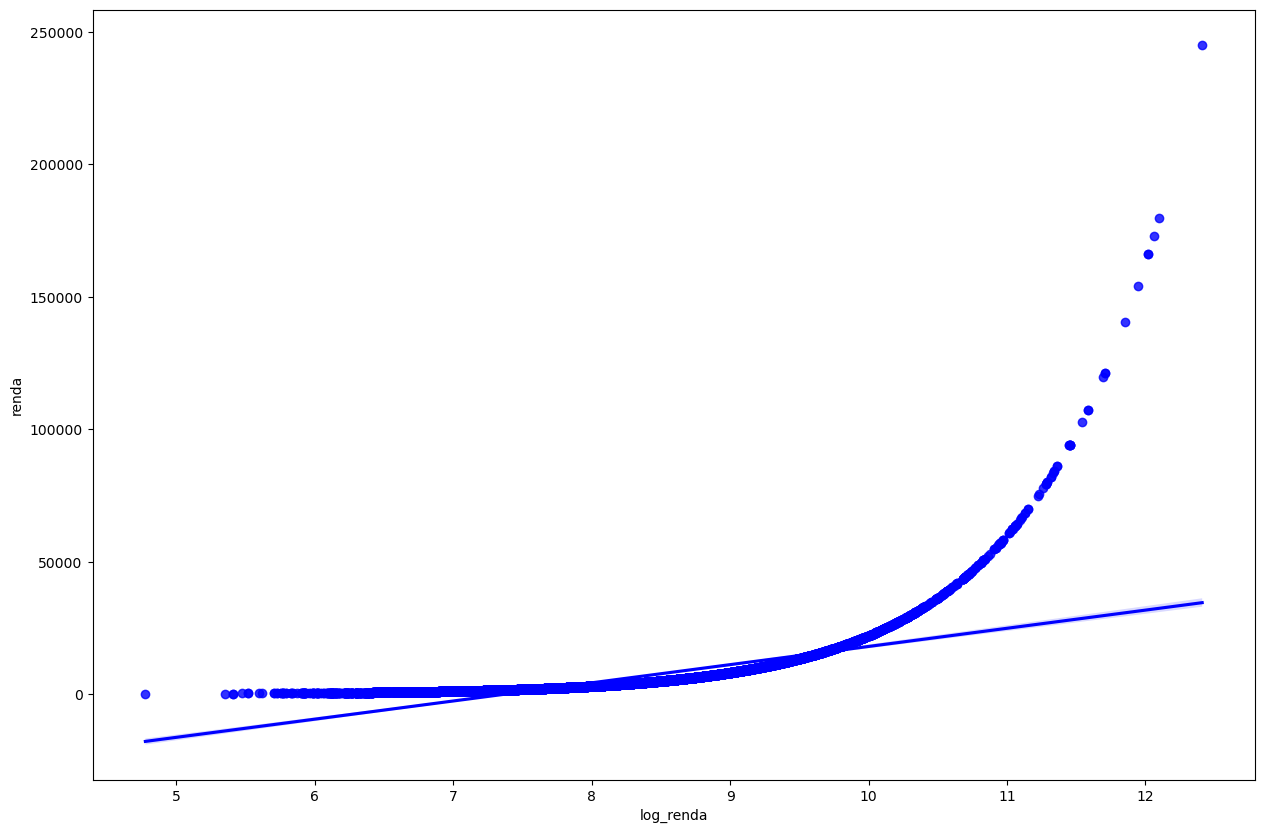

In [22]:
sns.regplot(x=interesse_log['log_renda'], y=interesse_log['renda'], color='blue');

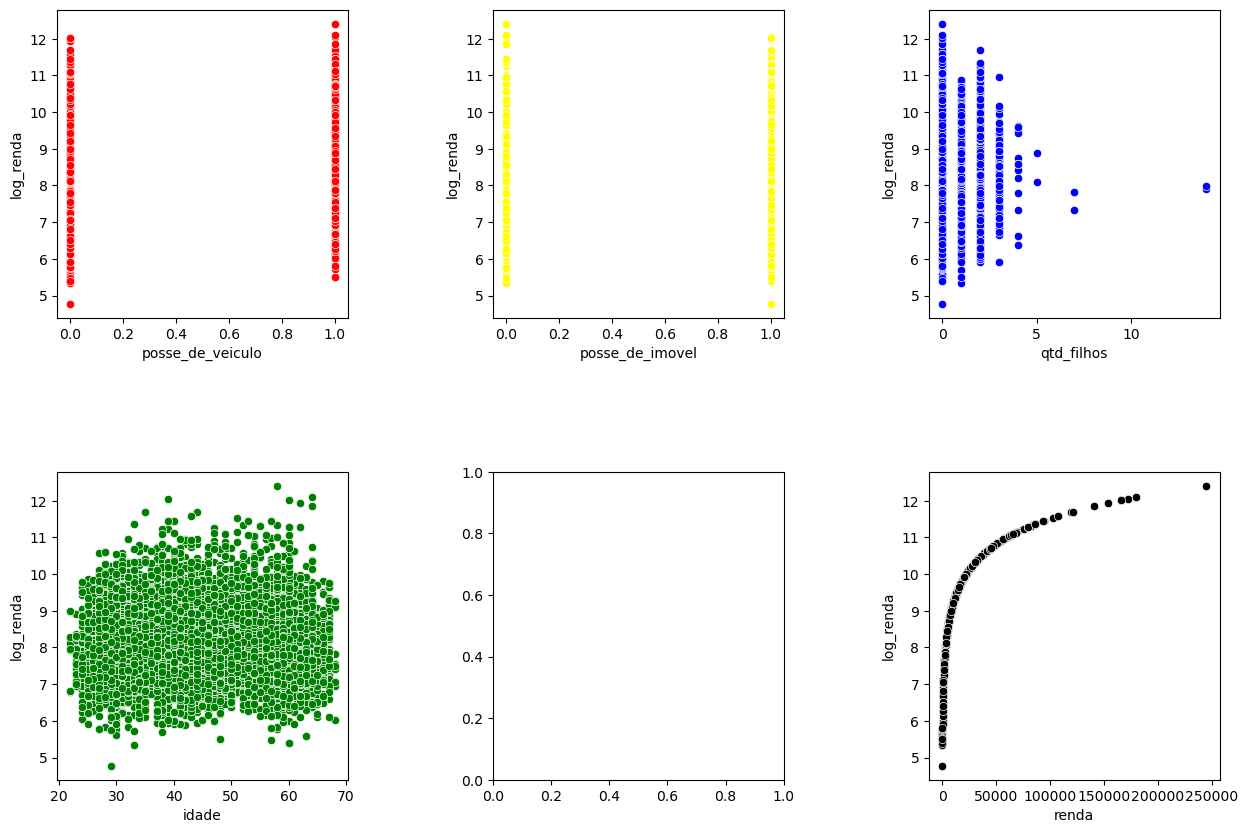

In [23]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax = axes[0, 0],x=interesse_log['posse_de_veiculo'], y=interesse_log['log_renda'], color='red');
sns.scatterplot(ax = axes[0, 1],x=interesse_log['posse_de_imovel'], y=interesse_log['log_renda'], color='yellow');
sns.scatterplot(ax = axes[0, 2],x=interesse_log['qtd_filhos'], y=interesse_log['log_renda'], color='blue');
sns.scatterplot(ax = axes[1, 0],x=interesse_log['idade'], y=interesse_log['log_renda'], color='green');
sns.scatterplot(ax = axes[1, 2],x=interesse_log['renda'], y=interesse_log['log_renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

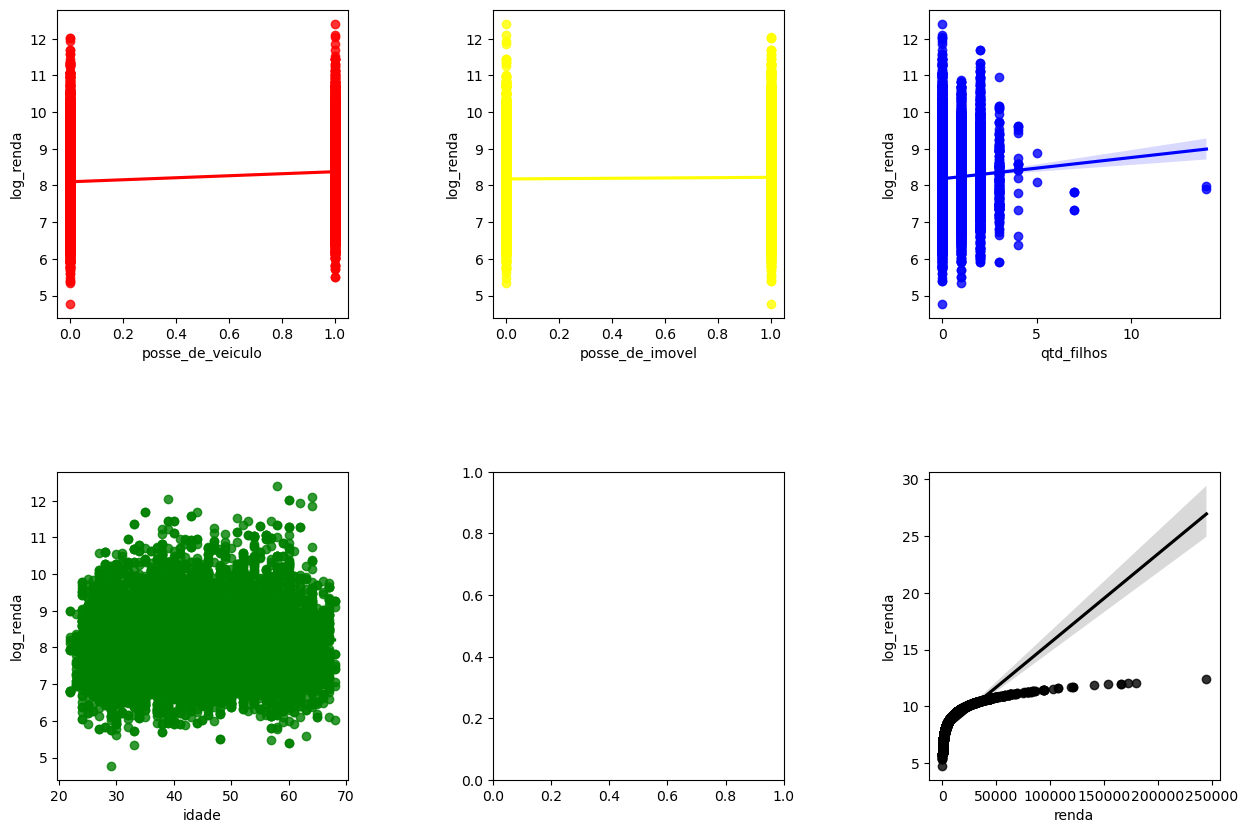

In [24]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.regplot(ax = axes[0, 0],x=interesse_log['posse_de_veiculo'], y=interesse_log['log_renda'], color='red');
sns.regplot(ax = axes[0, 1],x=interesse_log['posse_de_imovel'], y=interesse_log['log_renda'], color='yellow');
sns.regplot(ax = axes[0, 2],x=interesse_log['qtd_filhos'], y=interesse_log['log_renda'], color='blue');
sns.regplot(ax = axes[1, 0],x=interesse_log['idade'], y=interesse_log['log_renda'], color='green');
sns.regplot(ax = axes[1, 2],x=interesse_log['renda'], y=interesse_log['log_renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Acredito que a visualização ficou melhor e podemos ter maior percepção da distoção